In [54]:
import networkx as nx
import random
from hollow import *
from fib import *
import numpy as np
import heapq
def DijkstraTestHollow(a):
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = HollowHeap()
        h = None
        #heapq.heappush(h, (u, 0))
        h = heap.insert(0, u, h)
        
        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while h != None:
            n = h.value
            #d = distancestonodes[n].value
            d = h.key
            if n == v:
                break
            #heapq.heappop(h)
            h = heap.deleteMin(h)

            #edges = list(G.edges(n))
            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    h = heap.decKey(e, newd, h)
                    #distancestonodes[newd] = distancestonodes[distances[e]]
                if e not in distances:
                    distances[e] = newd
                    #heapq.heappush(h, (e, newd))
                    #distancestonodes[newd] = h
                    h = heap.insert(newd, e, h)


        t1 = time.process_time()
        times += t1 - t
    return times / 5
DijkstraTestHollow(100)

0.0007168775999999433

In [55]:
import networkx as nx
import random
from hollow import *
from fib import *
import heapq
def DijkstraTestFib(a):
    
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = FibonacciHeap()
        h = heap.insert(0)
        distancestonodes = {}
        distancestonodes[0] = h
        h.value = u

        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while heap.min != None:
            d = heap.min.key
            n = distancestonodes[d].value
            if n == v:
                break
            heap.extract_minimum()

            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    heap.decrease_key(distancestonodes[distances[e]], newd)
                    distancestonodes[newd] = distancestonodes[distances[e]]
                if e not in distances:
                    distances[e] = newd
                    h = heap.insert(newd)
                    distancestonodes[newd] = h
                    h.value = e


        t1 = time.process_time()
        times += t1 - t
    return times / 5
DijkstraTestFib(50)

0.0004254057999999894

In [56]:
import networkx as nx
import random
from hollow import *
from binom import *
import heapq
def DijkstraTestBinom(a):
    
    import time
    
    G = nx.gnp_random_graph(a, np.log(a)/a , seed=0, directed=True)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.random()
        
    times = 0
    
    for j in range(5):
        u = random.randint(0, a - 1)
        v = random.randint(0, a - 1)

        heap = BinomialHeap()
        h = heap.insert(0)
        distancestonodes = {}
        distancestonodes[0] = h
        h.value = u

        distances = {}
        distances[u] = 0

        adj = dict(G.adjacency())
        t = time.process_time()

        while heap.get_min() != None:
            d = heap.get_min()
            n = distancestonodes[d].value
            if n == v:
                break
            heap.del_min()

            for e in adj[n].keys():
                newd = d + adj[n][e]['weight']
                if e in distances and newd < distances[e]:
                    heap.dec_key(distancestonodes[distances[e]], newd)
                    distancestonodes[newd] = distancestonodes[distances[e]]
                if e not in distances:
                    distances[e] = newd
                    h = heap.insert(newd)
                    distancestonodes[newd] = h
                    h.value = e


        t1 = time.process_time()
        times += t1 - t
    return times / 5
DijkstraTestBinom(100)

0.011035396399999975

500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


Text(0, 0.5, 'Runtime (s)')

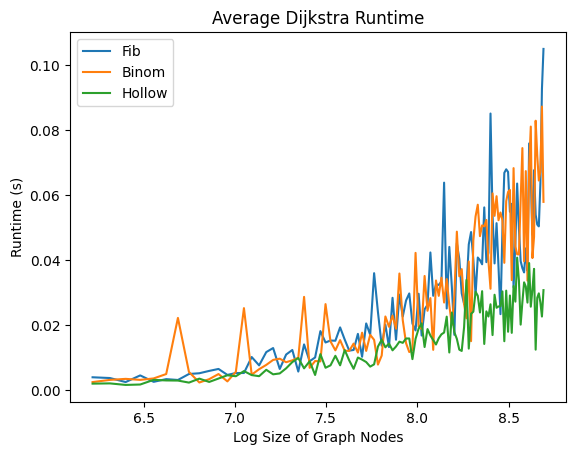

In [63]:
import matplotlib.pyplot as plt
import numpy as np
x = []
fib = []
hollow = []
binom = []

for i in range(500, 6000, 50):
    if i % 100 == 0:
        print(i)
    n = i + 3
    x.append(np.log(n))
    #print("testing fib")
    fib.append(DijkstraTestFib(n))
    #print("testing hollow")
    hollow.append(DijkstraTestHollow(n))
    #print("testing binom")
    binom.append(DijkstraTestBinom(n))
    
plt.plot(x,\
         fib, label='Fib')
plt.plot(x,\
         binom, label='Binom')

plt.title('Average Dijkstra Runtime')
plt.plot(x,\
         hollow, label='Hollow')

plt.legend()
plt.xlabel('Log Size of Graph Nodes')
plt.ylabel('Runtime (s)')

Text(0, 0.5, 'Runtime (s)')

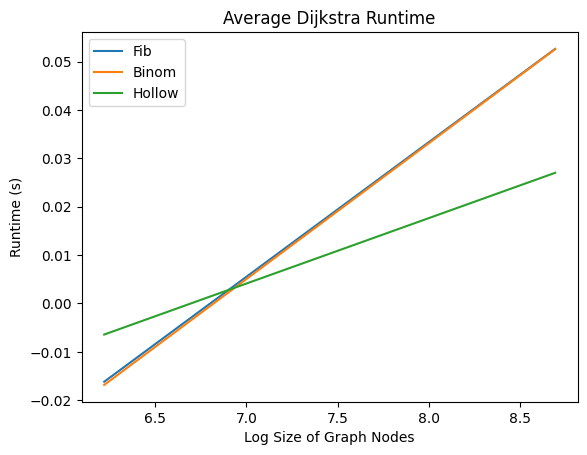

In [64]:
import numpy as np

pf = np.poly1d(np.polyfit(x, fib, 1))
pb = np.poly1d(np.polyfit(x, binom, 1))
ph = np.poly1d(np.polyfit(x, hollow, 1))
plt.plot(x,\
         pf(x), label='Fib')
plt.plot(x,\
         pb(x), label='Binom')

plt.title('Average Dijkstra Runtime')
plt.plot(x,\
         ph(x), label='Hollow')



plt.legend()
plt.xlabel('Log Size of Graph Nodes')
plt.ylabel('Runtime (s)')